In [ ]:
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from collections import Counter
#import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,validation_curve


from sklearn.experimental import enable_iterative_imputer  

from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor , RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from matplotlib import cm
from sklearn.svm import SVC


from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, precision_score,recall_score,plot_confusion_matrix,confusion_matrix,f1_score, accuracy_score
from sklearn.metrics import mean_squared_error
labelencoder = LabelEncoder () 
pd.options.mode.chained_assignment = None 

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from collections import Counter
#import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,validation_curve


from sklearn.experimental import enable_iterative_imputer  

from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor , RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from matplotlib import cm
from sklearn.svm import SVC


from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, precision_score,recall_score,plot_confusion_matrix,confusion_matrix,f1_score, accuracy_score
from sklearn.metrics import mean_squared_error
labelencoder = LabelEncoder () 
pd.options.mode.chained_assignment = None 

# Chargement des données

In [ ]:
#import data  
def data_loading(path):
    #load
    data = pd.concat(pd.read_excel(path, sheet_name=None), ignore_index=True)
    #rename some columns
    data.rename(columns={'Sexe du patient (e)': "Sexe", 'Age du patient (e)':'Age',
                         'Profession du patient(e)':'Profession'},inplace=True)
    #Replace Nan of the feature Profession by 'Non précisé'
    if set(["Profession"]).issubset(data.columns):
        data["Profession"]=data["Profession"].replace(np.nan, 'Non précisé', regex=True)
    
    #Regenerate auto the field 'tranche d'age' 
    data["Tranche d'âge"] = pd.cut(x=data['Age'], bins=[0,5,10,16,20,30,40,50,60,70,80,90,100,110,120])
                         
    if set(["Ordre1"]).issubset(data.columns):
        data.drop(["Ordre1"],axis=1, inplace=True)
         
    return data

data = data_loading("D:/3cs/datasets/HTA1.xlsx")
data

,Ordre,N°Médecin,N°Patient,Client,Sexe,Age,Tranche d'âge,Profession,Assurance,Marié,...,Pathologies Rénales,Syndrome métabolique (déclaratif),Syndrome métabolique (théorique),Les complications du diabète,HDL,Type de patient,PDyslipidemie,Pathologies cardiaques,Pathologies vasculaires,Pathologies Rénales
0,190001,E028,H2019V1E028MIP01,Commun,homme,85.0,"(80.0, 90.0]",Retraité,Oui,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,190002,E028,H2019V1E028MIP02,Commun,homme,92.0,"(90.0, 100.0]",Retraité,Oui,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,190003,E028,H2019V1E028MIP03,Commun,homme,64.0,"(60.0, 70.0]",Menuisier,Non,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,190004,E028,H2019V1E028MIP04,Commun,homme,82.0,"(80.0, 90.0]",Sans profession,Oui,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,190005,E028,H2019V1E028MIP05,Commun,homme,66.0,"(60.0, 70.0]",Agriculteur,Non,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10247,283086,2046,204614,NaN,Femme,65.0,"(60.0, 70.0]",Non précisé,OUI,OUI,...,NaN,NaN,NaN,Aucune,NaN,NaN,NaN,NaN,NaN,NaN
10248,283087,2091,200765,NaN,Homme,68.0,"(60.0, 70.0]",Retraité,OUI,OUI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10249,283088,213,202508,NaN,Femme,77.0,"(70.0, 80.0]",Non précisé,OUI,OUI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10250,283089,2224,202138,NaN,Homme,NaN,NaN,Non précisé,NON,OUI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Profilage de données

# Detection et traitement des données aberrante

### 1. Sélection des variables

In [ ]:
#------------------------traitement of Outliers and MD for the subset 
#                       'Sexe, Age, Tranche d'âge, Profession, Assurance, Marié, Taille (cm), Poids (kg), Vague, Ordre'
def SubsetSelection(data):
    data2=data.copy(deep=False)
    if set(['Ordre','Sexe', 'Age',"Tranche d'âge",'Profession','Assurance','Taille (cm)',
            'Poids (kg)','Marié']).issubset(data2.columns):
        df=data2[['Ordre','Sexe', 'Age',"Tranche d'âge",'Assurance',
                  'Taille (cm)','Poids (kg)','Marié','Vague']]
        return df
    else: 
        return 0;
df=SubsetSelection(data)




In [ ]:
# Select data : select the necessary colomuns to data cleaning and prepare data to clean
def features_selection_PT(df):
    df1=df.copy(deep=False)
    #Ignore the warnings in relation with the copy and the original data
    pd.options.mode.chained_assignment = None 
    df1.drop(["Sexe","Assurance","Marié","Vague"],axis=1, inplace=True)
    return df1

def get_na(df1,df_no_na):
    #  ~ : save the records that contains missing values in df_only_na
    df2= df1.copy()
    df2.drop(["Tranche d'âge"],axis=1, inplace=True)
    df_only_na = df2[~df2.index.isin(df_no_na.index)]
    return df_only_na

# drop the missing values from  df1 dataset
df1 = features_selection_PT(df)
df_no_na = df1.dropna()
df_no_na.drop(["Tranche d'âge"],axis=1, inplace=True)

df_only_na =  get_na(df1,df_no_na)

### 2. Détection des outliers

In [ ]:
def Outliers_Detection(df_no_na):
    """ df_no_na : a dataset that does not containe missing data
        detect the outliers by DBSCAN
    """
    DB = DBSCAN(min_samples = 15, eps =55).fit(df_no_na)
    #calculate the number of outliers 
    nbr_outliers= Counter( DB.labels_)
    nbr_outliers
    return(DB.labels_)

def Outliers_Visualization(DB_labels, df_no_na):
    """DB_labels: a matrix given by DBSCAN
       df_no_na: a dataset that does not containe missing data
    """
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    cmap = cm.get_cmap('Set1')
    #vizualise 3D
    ax.scatter3D(df_no_na['Age'], df_no_na['Poids (kg)'],df_no_na['Taille (cm)'],c=DB_labels,marker='x',cmap=cmap, s=30);
    ax.set_xlabel('Age', fontsize=14, color="blue")
    ax.set_ylabel('Poids',fontsize=14, color="blue")
    ax.set_zlabel('Taille',fontsize=14, color="blue")
    plt.title("Detection of outliets by DBSCAN/ Outilers are on red", fontsize=12, color='blue')
    plt.show()

def Outliers_print(DB_labels,df_no_na):
    df_outliers_only=df_no_na[DB_labels == -1].head(3)
    return(df_outliers_only)


    

    


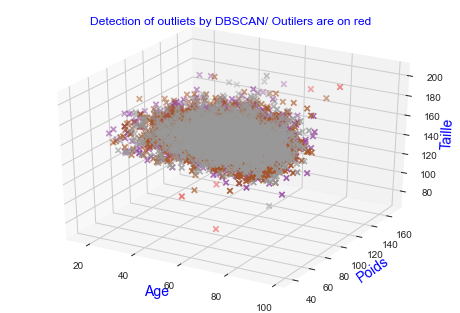

In [ ]:
DB_labels=Outliers_Detection(df_no_na)
Outliers_Visualization(DB_labels, df_no_na)

In [ ]:
df_outliers_only= Outliers_print(DB_labels,df_no_na)
df_outliers_only


,Ordre,Age,Taille (cm),Poids (kg)
245,190246,51.0,105.0,95.0
2183,192186,58.0,72.0,75.0
2245,192248,49.0,110.0,60.0


### 3. Traitement des outliers

In [ ]:
def outliers_Poid_Taille_traitement(df_outliers_only, df_no_na, df1):
    if df_outliers_only.empty ==False :
        #extracte the dataset without outliers
        df_no_outlier= df_no_na[~df_no_na.index.isin(df_outliers_only.index)]
        # ------ treatment of outliers (1)
        #Merge  df_no_outlier and df_outliers_only with the initial dataset "df1" 
        #on the column "tranche d'age"
        df_no_outlier = pd.merge(df_no_outlier, df1[["Tranche d'âge"]], left_index=True, right_index=True)
        df_outliers_only = pd.merge(df_outliers_only, df1[["Tranche d'âge"]], left_index=True, right_index=True)
        # ------ treatment of outliers (2)-----------
        #Calculate the mean of the column( Taille) and the weight (poids) by 'tranche d'age'
        df_no_outlier['moyenne_taille'] = df_no_outlier.groupby("Tranche d'âge")['Taille (cm)'].transform('mean')
        df_no_outlier['moyenne_poids'] = df_no_outlier.groupby("Tranche d'âge")['Poids (kg)'].transform('mean')
        # ------ treatment of outliers (3)-----------
        
        #replace values of "taille" and "poids" with their mean corresponding to "tranche d'age"
        #set "tranche d'age" as the index of s1 and S2
        s1 = df_no_outlier.set_index("Tranche d'âge")['moyenne_taille']
        s1=s1.drop_duplicates()
        s2= df_no_outlier.set_index("Tranche d'âge")['moyenne_poids']
        s2=s2.drop_duplicates()
        #map the age class "tranche d'age" of each outlier with the mean 
        df_outliers_only['Taille (cm)'] = df_outliers_only["Tranche d'âge"].map(s1)
        df_outliers_only['Poids (kg)'] = df_outliers_only["Tranche d'âge"].map(s2)
        #Concatinate the 'df_outliers_only' dataset with 'df_no_outlier' to get the full dataset 
        #without NA and with corrected outliers 4 columns only 
        #drop the columns 'moyenne_taille, moyenne_poids' to succed the concatination
        df_no_outlier.drop(df_no_outlier[['moyenne_taille','moyenne_poids']],axis=1, inplace=True) 
        df_outliers_cleaned=pd.concat([df_no_outlier,df_outliers_only])
        
        return(df_outliers_cleaned)
    else:
        df_outliers_cleaned= df_no_na.copy()
        return df_outliers_cleaned

    

def final_cleand_outliers_withNa(df_only_na,df_outliers_cleaned, df):
    # get the full cleaned dataset from outliers, with missing values with 4 columns only
    df_cleaned_na=pd.concat([df_only_na,df_outliers_cleaned])
    
    # merge 'df_clained_na' with 'data' to get all the columns
    dataset_cleaned= pd.merge(df_cleaned_na, df[['Sexe','Assurance',"Marié",'Vague']], 
                              left_index=True, right_index=True)
    dataset_cleaned=dataset_cleaned[['Ordre','Sexe','Age',"Tranche d'âge",'Assurance',"Marié",'Taille (cm)',
                                     'Poids (kg)','Vague']]
    dataset_cleaned.sort_index(inplace=True)
    
    return (dataset_cleaned)


In [ ]:
df_outliers_cleaned=outliers_Poid_Taille_traitement(df_outliers_only,df_no_na,df1)

In [ ]:
df_outliers_only=pd.merge(df_outliers_only, df_outliers_cleaned[["Age","Taille (cm)","Poids (kg)"]], left_index=True, right_index=True)
df_outliers_only

,Ordre,Age_x,Taille (cm)_x,Poids (kg)_x,Age_y,Taille (cm)_y,Poids (kg)_y
245,190246,51.0,105.0,95.0,51.0,166.440601,78.417387
2183,192186,58.0,72.0,75.0,58.0,166.440601,78.417387
2245,192248,49.0,110.0,60.0,49.0,167.216477,78.249781
8236,281073,81.0,187.0,160.0,81.0,164.969940,72.254509
8966,281804,66.0,175.0,168.0,66.0,166.022382,77.259484


In [ ]:
dataset_cleaned=final_cleand_outliers_withNa(df_only_na,df_outliers_cleaned, df)

# Traitement des données manquantes


### 1. Sélection des variables à inclure dans le modèle d'imputation

In [ ]:
#-----------------------Traitement of the missing values

#drop variables that are not useful for the imputation  and Tranche d'age"

def drop_columns_for_imputation(dataset_cleaned):
    if set(["Tranche d'âge"]).issubset(dataset_cleaned.columns):
        dataset_cleaned.drop(["Tranche d'âge"],axis=1, inplace=True)
    return dataset_cleaned


dataset_cleaned=drop_columns_for_imputation(dataset_cleaned)

In [ ]:
#Converts first character of values of categorical variables "Sexe, Assurance, Marié" to uppercase 
#and remaining to lowercase.
def capitalize(dataset_cleaned):
    dataset_cleaned['Assurance']=dataset_cleaned['Assurance'].str.title() 
    dataset_cleaned['Marié']=dataset_cleaned['Marié'].str.title()
    dataset_cleaned['Sexe']=dataset_cleaned['Sexe'].str.title()
    return dataset_cleaned

dataset_cleaned = capitalize(dataset_cleaned)

### 2. Encodage des variables qualitatives

In [ ]:
#------------------transform categorical variables to dummies----------------------------------------
def categorical_to_dummies_TP(dataset_cleaned): 
#     enter the dataset cleaned from outliers
    if set(["Sexe","Assurance","Marié"]).issubset(dataset_cleaned.columns):
        dummies_variables=pd.get_dummies(dataset_cleaned[['Sexe','Assurance','Marié']])
        # add NaN to the dummy variables because the function "get_dummies()" replace NaN with 0 
        dummies_variables.loc[dataset_cleaned.Sexe.isnull(), dummies_variables.columns.str.startswith("Sexe_")] = np.nan
        dummies_variables.loc[dataset_cleaned.Assurance.isnull(), dummies_variables.columns.str.startswith("Assurance_")] = np.nan
        dummies_variables.loc[dataset_cleaned.Marié.isnull(), dummies_variables.columns.str.startswith("Marié_")] = np.nan
        # select numerical columns and Add dummy columns to the original cleanded dataset
        dataset_cleaned.drop(["Sexe","Assurance","Marié"],axis=1, inplace=True)
    
    dataset_with_dummies= pd.merge(dataset_cleaned,dummies_variables, left_index=True, right_index=True)
    
    return dataset_with_dummies


dataset_with_dummies = categorical_to_dummies_TP(dataset_cleaned)

#create a copy for this dataset in order to use it in the final imputation function
dataset_to_impute= dataset_with_dummies.copy()

### 3. Sélection du modèle des données complètes

In [ ]:
# ------------Imputation of missing data ---------
#  drop nan from "dataset_with_dummies" in order to create the model with

X_full_no_na= dataset_with_dummies.dropna()
#  ~ : save the records that contains missing values in 'df_only_na' which we'll predict by the model created by "X_full_no_na"

#df_only_na = dataset_with_dummies[~dataset_with_dummies.index.isin(X_full_no_na.index)]

Y_full=X_full_no_na.copy()
n_samples, n_features= X_full_no_na.shape



### 4.  Modéliation et évaluation

In [ ]:
def add_NA_to_each_row(X_full_no_na):
    #Add a single missing value to each row "X_missing"
    n_samples, n_features= X_full_no_na.shape
    rng = np.random.RandomState(0)
    X_missing = X_full_no_na.copy()
    n_samples=round(n_samples/3)
    
    #get the indexes of the dataframe "X_missing" and save them in "missing_samples"
    missing_samples= X_missing.index 
    
    #save the name of the columns in an array "columns_array"
    columns_array= np.array(["Age","Taille (cm)","Poids (kg)","Sexe_Femme","Sexe_Homme","Assurance_Non","Assurance_Nsp",
                "Assurance_Oui","Marié_Non","Marié_Oui","Marié_Nsp"])
    
    #generate a table of values 0,3,2,5,columns_array.shape[0],6,5,8,7,4,2,, (for each row generate the number of the column)
    missing_features =rng.choice(columns_array.shape[0], n_samples, replace=True)
    for i in range(n_samples):
        X_missing.loc[missing_samples[i],columns_array[missing_features[i]]]=np.nan
        
    return(X_missing)

In [ ]:
X_missing=add_NA_to_each_row(X_full_no_na)

In [ ]:
######## estimate the score of models of NaN_imputation

def estimate_score_KNNImputer(X_missing,Y_full):
    
    # ---------------Estimate the score of KNNImputer for the missing values
    
    #14 is the best
    
    score_KNN = pd.DataFrame()
    for i in np.arange(2,20):
        estimator = make_pipeline(
        KNNImputer(n_neighbors =i),
         LinearRegression()
        )
        score_KNN[i] = cross_val_score(estimator, X_missing, Y_full, 
                                               scoring='neg_mean_squared_error',
                                               cv=5)
        
    score_KNN_imputer= score_KNN
    return (score_KNN_imputer)

def estimate_score_ItterativeImputer(X_missing,Y_full):
    # Estimate the score of iterative imputer for the missing values
    #with different estimators
    br_estimator =LinearRegression()
    
    estimators = [
        BayesianRidge(),
        DecisionTreeRegressor(max_features='sqrt', random_state=0),
        ExtraTreesRegressor(n_estimators=20, random_state=0),
        KNeighborsRegressor(n_neighbors=14)
    ]
    score_iterative_imputer = pd.DataFrame()
    for impute_estimator in estimators:
        estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator
        )
        score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, X_missing, Y_full, scoring='neg_mean_squared_error',
            cv=5)
    scores_itterative_imputers=score_iterative_imputer
    return(scores_itterative_imputers) #scores

def estimate_score_imputers(X_missing, Y_full):
    #scores
    score_KNN_imputer= estimate_score_KNNImputer(X_missing,Y_full)
    scores_itterative_imputers=estimate_score_ItterativeImputer(X_missing,Y_full)
    scores = pd.concat([score_KNN_imputer, scores_itterative_imputers],
                       keys=['KNN_imputer', 'IterativeImputer'], axis=1)
    scores_mean= pd.DataFrame(scores.mean())
    return(scores_mean)

def estimate_best_imputer(scores_mean):
    max_score=scores_mean.max()
    best_imputer=scores_mean[scores_mean.values == max_score.values]
    best_imputer
    return best_imputer

#Vizualisation of the scores


def vizualise_scores(scores_mean):
    scores_mean_viz=scores_mean.copy(deep=False)
    scores_mean_viz=-scores_mean_viz
    scores_mean_viz.rename(columns={0: "Score"}, inplace=True)
    fig, axes = plt.subplots(2,1)

    scores_mean_viz.xs('KNN_imputer').plot(kind='bar',ax=axes[0],figsize=(10, 10))
    axes[0].set_title("the scores of KNN_Imputer by the number of neighbors ",fontsize=18)
    axes[0].set_xlabel('number of neighbors', fontsize=15, color="gray")
    axes[0].set_ylabel(' score, MSE (smaller is better)', fontsize=15, color="gray")
  
    scores_mean_viz.xs('IterativeImputer').plot(kind='bar',ax=axes[1],figsize=(10, 10))
    axes[1].set_title("the scores of Iterative_Imputer by type of regressor ",fontsize=18)
    axes[1].set_xlabel('Type of regressor applied to itterative imputation', fontsize=15, color="gray")
    axes[1].set_ylabel(' score, MSE (smaller is better)', fontsize=15, color="gray")
    
    plt.tight_layout(pad=0.1)
    plt.show()



In [ ]:
scores_mean=estimate_score_imputers(X_missing, Y_full)
scores_mean

0
KNN_imputer      2                     -1.443749
                 3                     -1.266668
                 4                     -1.248725
                 5                     -1.222755
                 6                     -1.208802
                 7                     -1.160576
                 8                     -1.161230
                 9                     -1.121541
                 10                    -1.088940
                 11                    -1.080822
                 12                    -1.058871
                 13                    -1.063415
                 14                    -1.052201
                 15                    -1.043832
                 16                    -1.045399
                 17                    -1.052555
                 18                    -1.031671
                 19                    -1.030154
IterativeImputer BayesianRidge         -0.806152
                 DecisionTreeRegressor -2.094188
                 ExtraTreesRegressor   -1.007070
                 KNeighborsRegressor   -1.050389

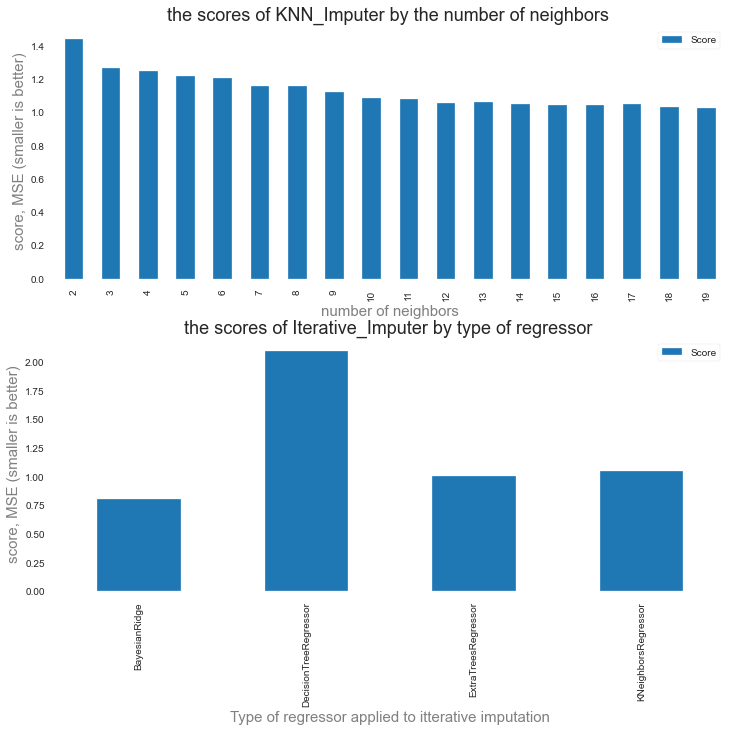

In [ ]:
vizualise_scores(scores_mean)

In [ ]:
best_imputer=estimate_best_imputer(scores_mean)
best_imputer

,,0
IterativeImputer,BayesianRidge,-0.806152


In [ ]:
# graph for data distribution
def original_imputed_graph(y_full_predicted,Y_full):
    ax = plt.gca()
    predicted_value = ax.scatter(y_full_predicted["Taille (cm)"], y_full_predicted["Poids (kg)"], color="r")
    real_value = ax.scatter(Y_full["Taille (cm)"], Y_full["Poids (kg)"], color="b")
    plt.xlabel("Taille (cm)")
    plt.ylabel("Poids (kg)")
    plt.legend((real_value, predicted_value),('originale', 'imputée'))

### 5. Imputation par le meilleur modèle

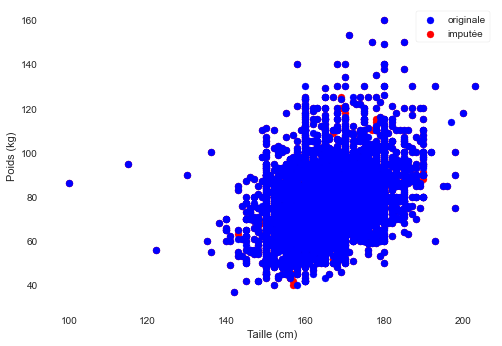

In [ ]:
#-------------------imputation methodes-------------------------

def  BRidge(dataset_to_impute):
    imputer= IterativeImputer(random_state=0, estimator=BayesianRidge())
    imputed_data=imputer.fit_transform(dataset_to_impute)
    return(imputed_data)
def DecisionTree(dataset_to_impute):
    imputer=  IterativeImputer(random_state=0, estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0))
    imputed_data=imputer.fit_transform(dataset_to_impute)
    return(imputed_data)

def RF(dataset_to_impute) :
    imputer=  IterativeImputer(random_state=0, estimator= ExtraTreesRegressor(n_estimators=10, random_state=0))
    imputed_data=imputer.fit_transform(dataset_to_impute)
    return imputed_data
    
def KNNRegressor(dataset_to_impute):
    imputer=  IterativeImputer(random_state=0, estimator=  KNeighborsRegressor(n_neighbors=20))
    imputed_data=imputer.fit_transform(dataset_to_impute)
    return imputed_data
    
def KnnImputer(dataset_to_impute,nbr_neighbors):
    imputer = KNNImputer(n_neighbors=nbr_neighbors)
    imputed_data=imputer.fit_transform(dataset_to_impute)
    return imputed_data
# -----------------imputation with best methode-------------------------    
def imputation(dataset_to_impute,best_imputer):
    
    best_imputer_idx1=best_imputer.copy()
    best_imputer_idx2=best_imputer.copy()
    best_imputer_idx1.index = best_imputer.index.get_level_values(0)
    best_imputer_idx2.index = best_imputer.index.get_level_values(1)
    meth=best_imputer_idx1.index.values[0]
    estimator=best_imputer_idx2.index.values[0]
    #imputed_data= KnnImputer(dataset_to_impute,2) 

    if (meth=='IterativeImputer'):
        if (estimator=='DecisionTreeRegressor'):
            imputed_data= DecisionTree(dataset_to_impute)  
        elif (estimator=='ExtraTreesRegressor'):
            imputed_data= RF(dataset_to_impute)
        elif (estimator=='KNeighborsRegressor'):
            imputed_data=KNNRegressor(dataset_to_impute)
        elif(estimator=='BayesianRidge'):
            imputed_data= BRidge(dataset_to_impute)
        
    elif (meth=='KNN_imputer'):
        nbr_neighbors=estimator
        imputed_data= KnnImputer(dataset_to_impute,nbr_neighbors)
        
    df_complet =pd.DataFrame(imputed_data)
    df_complet.rename(columns={0: "Ordre", 1:"Age",2: "Taille (cm)", 3: "Poids (kg)",4:"Vague", 5:"Sexe_Femme",6:"Sexe_Homme",
                               7:"Assurance_Non",8:"Assurance_Nsp",9:"Assurance_Oui",10:"Marié_Non",11:"Marié_Nsp", 12:"Marié_Oui"}, inplace=True)
   

    #round the values of the numeric features to int
    df_complet["Taille (cm)"]= round(df_complet["Taille (cm)"])
    df_complet["Poids (kg)"]= round(df_complet["Poids (kg)"])
    df_complet["Age"]= round(df_complet["Age"])

    df_complet.sort_index(inplace=True)

    return(df_complet)
y_full_predicted = imputation(X_missing,best_imputer)  
original_imputed_graph(y_full_predicted,Y_full)

In [ ]:
# --------------------- call imputation function------------------------------------
df_complet=imputation(dataset_to_impute,best_imputer)

In [ ]:
df_fdr_pathol = pd.merge(df_complet, data[["Profil","Facteurs de risque","nombre de Profil","nombre de FDR","Depuis quand HTA  (mois)"]], left_index=True, right_index=True)


# Création de nouvelles variables

In [ ]:
def set_IMCtype(df_fdr_pathol):
    df_fdr_pathol.loc[df_fdr_pathol.IMC.between(0,18.5,inclusive=False), "Type IMC"] = "Insuffisance pondérale"
    df_fdr_pathol.loc[df_fdr_pathol.IMC.between(18.5,24.999), "Type IMC"] = "Poids idéal"
    df_fdr_pathol.loc[df_fdr_pathol.IMC.between(25,29.999), "Type IMC"] = "Surpoids"
    df_fdr_pathol.loc[df_fdr_pathol.IMC.between(30,34.999), "Type IMC"] ="Obésité modérée"
    df_fdr_pathol.loc[df_fdr_pathol.IMC.between(35,39.999), "Type IMC"] = "Obésité sévere"
    df_fdr_pathol.loc[df_fdr_pathol.IMC>=40, "Type IMC"] = "Obésité morbide "
    df_fdr_pathol.loc[df_fdr_pathol.IMC==-1, "Type IMC"] = "IMC non significatif"
        
    #df_fdr_pathol['Type IMC'] = labelencoder.fit_transform (df_fdr_pathol['Type IMC'])
    return df_fdr_pathol
def calculate_IMC(df_fdr_pathol):
#  calculate the "IMC" (BMI:body mass index) = weight(kg)/ height²(m)
    df_fdr_pathol.loc[df_fdr_pathol.Age.between(16,65), 'IMC'] = df_fdr_pathol["Poids (kg)"].div((df_fdr_pathol["Taille (cm)"]/100)**2)
    df_fdr_pathol.loc[~df_fdr_pathol.Age.between(16,65), 'IMC'] = -1
    df_fdr_pathol.round(3)
    df_fdr_pathol['IMC'] = df_fdr_pathol['IMC'].astype(float).round(3)
    #df_fdr_pathol=set_IMCtype(df_fdr_pathol)
    #df_fdr_pathol.drop(["IMC"],axis=1, inplace=True)
    return df_fdr_pathol
    



In [ ]:
df_fdr_pathol= calculate_IMC(df_fdr_pathol)

In [ ]:
def format_pathologies(df):
    #get number of pathologies of each patient
    if set(["Profil"]).issubset(df.columns):
        #fill some nan in "Profil" manually based on the information of "nombre de Profil" and "Profil"
        if(((df["Profil"].isnull()) & (df["nombre de Profil"]==0)).any()):
            df["Profil"].loc[(df["Profil"].isnull()) & (df["nombre de Profil"]==0) ]="aucun"
        
        if(((df["Profil"].isnull()) & (df["nombre de Profil"].isnull())).any()):
            df["Profil"].loc[(df["Profil"].isnull()) & (df["nombre de Profil"].isnull()) ]="nsptempo"
        
        #transform all values of "Facteurs_de_risque" to lowercase
        df['Profil'] = df['Profil'].str.lower()
        
        #unify the value of the column,some rows contain the value "hta seule" preceded or followed with other characters
        df.loc[df['Profil'].str.contains('hta seule'), 'Profil'] = "hta seule"

def split_profil(df):
    # get pathologies of each patient from profile variable
    if set(["Profil"]).issubset(df.columns):
        df['Profil'] = df['Profil'].str.lower()
        df["diabete"] = (df["Profil"].str.contains("diabète")).astype(int)
        df["dyslipidémie"] = (df["Profil"].str.contains("dysl")).astype(int)
        df["M_cardiaque"] = (df["Profil"].str.contains("card")).astype(int)
        df["M_vaisseaux"] = (df["Profil"].str.contains("vaisseaux|vx")).astype(int)
        df["M_coronarienne"] = (df["Profil"].str.contains("coronarienne")).astype(int)
        df["M_rénale"] = (df["Profil"].str.contains("rénale")).astype(int)
        df["Aucune_Pathologie"] = (df["Profil"].str.contains("aucun")).astype(int)
        if((df["Profil"]=="nsptempo").any()):
            df["diabete"].loc[(df["Profil"]=="nsptempo")]= np.nan
            df["dyslipidémie"].loc[(df["Profil"]=="nsptempo")]= np.nan
            df["M_cardiaque"].loc[(df["Profil"]=="nsptempo")]= np.nan
            df["M_vaisseaux"].loc[(df["Profil"]=="nsptempo")]= np.nan
            df["M_coronarienne"].loc[(df["Profil"]=="nsptempo")]= np.nan
            df["M_rénale"].loc[(df["Profil"]=="nsptempo")]= np.nan
    return df

  
    

In [ ]:
format_pathologies(df_fdr_pathol)

In [ ]:
split_profil(df_fdr_pathol)


,Ordre,Age,Taille (cm),Poids (kg),Vague,Sexe_Femme,Sexe_Homme,Assurance_Non,Assurance_Nsp,Assurance_Oui,...,nombre de FDR,Depuis quand HTA (mois),IMC,diabete,dyslipidémie,M_cardiaque,M_vaisseaux,M_coronarienne,M_rénale,Aucune_Pathologie
0,190001.0,85.0,175.0,80.0,12019.0,0.0,1.0,0.0,0.0,1.0,...,1,120.0,-1.000,1,1,1,0,0,0,0
1,190002.0,92.0,177.0,96.0,12019.0,0.0,1.0,0.0,0.0,1.0,...,3,240.0,-1.000,0,1,1,0,1,1,0
2,190003.0,64.0,180.0,84.0,12019.0,0.0,1.0,1.0,0.0,0.0,...,2,72.0,25.926,0,0,0,0,0,0,0
3,190004.0,82.0,176.0,95.0,12019.0,0.0,1.0,0.0,0.0,1.0,...,3,240.0,-1.000,1,1,1,1,1,1,0
4,190005.0,66.0,179.0,75.0,12019.0,0.0,1.0,1.0,0.0,0.0,...,1,6.0,-1.000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10247,283086.0,65.0,158.0,73.0,22018.0,1.0,0.0,0.0,0.0,1.0,...,2,NaN,29.242,0,0,1,0,0,0,0
10248,283087.0,68.0,170.0,69.0,22018.0,0.0,1.0,0.0,0.0,1.0,...,3,72.0,-1.000,0,0,1,0,0,0,0
10249,283088.0,77.0,167.0,80.0,22018.0,1.0,0.0,0.0,0.0,1.0,...,3,NaN,-1.000,0,0,1,0,0,0,0
10250,283089.0,58.0,172.0,64.0,22018.0,0.0,1.0,1.0,0.0,0.0,...,2,36.0,21.633,0,0,1,0,0,0,0


In [ ]:
def formate_FDR(df):
    #get number of pathologies of each patient
    if set(["Facteurs de risque"]).issubset(df.columns):
        
        #transform all values of "Facteurs_de_risque" to lowercase
        df["Facteurs de risque"] = df["Facteurs de risque"].str.lower()
        if(((df["Facteurs de risque"].isnull()) & (df["nombre de FDR"].isnull())).any()):
            df["Facteurs de risque"].loc[(df["Facteurs de risque"].isnull()) & (df["nombre de FDR"].isnull()) ]="nsptempo"
       
        #Fill some NaN of the column "Facteur_de_risue" by the contenent of "nombre de FDR"
        if(((df["Facteurs de risque"].isnull()) & (df["nombre de FDR"]==0)).any()):
            df["Facteurs de risque"].loc[(df["Facteurs de risque"].isnull()) & (df["nombre de FDR"]==0) ]="aucun"
       
     
        #unify the value of the column,some rows contain the value "aucun" preceded or followed with other characters
        df.loc[df["Facteurs de risque"].str.contains('aucun'), "Facteurs de risque"] = 'aucun'

        
def split_FDR(df):
    # extract FDR needed for the classification "sédentarité", "obésité","tabagisme","ATCD familiaux d'HTA","ATCD CV"
    if set(["Facteurs de risque"]).issubset(df.columns):
        df['Facteurs de risque'] = df['Facteurs de risque'].str.lower() 
        df["sédentarité"] = (df["Facteurs de risque"].str.contains("sédentarité")).astype(int)
        df["obésité"] = (df["Facteurs de risque"].str.contains("obésité")).astype(int)
        df["tabagisme"] = (df["Facteurs de risque"].str.contains("tabagisme")).astype(int)
        df["ATCD_familiaux_HTA"] = (df["Facteurs de risque"].str.contains("atcd familiaux d'hta")).astype(int)
        df["ATCD_CV"] = (df["Facteurs de risque"].str.contains("atcd cv|atcd familiaux cardiovasculaire")).astype(int)
        df["Aucun_FDR"] = (df["Facteurs de risque"].str.contains("aucun")).astype(int)
        if((df["Facteurs de risque"]=="nsptempo").any()):
            df["sédentarité"].loc[(df["Facteurs de risque"]=="nsptempo")]= np.nan
            df["obésité"].loc[(df["Facteurs de risque"]=="nsptempo")]= np.nan
            df["tabagisme"].loc[(df["Facteurs de risque"]=="nsptempo")]= np.nan
            df["ATCD_familiaux_HTA"].loc[(df["Facteurs de risque"]=="nsptempo")]= np.nan
            df["ATCD_CV"].loc[(df["Facteurs de risque"]=="nsptempo")]= np.nan
       

    
def count_FDR_Pathologies(df):
    # count number of FDR and pathologies
    df["nb_FDR"] = df[["sédentarité","obésité","tabagisme","ATCD_familiaux_HTA","ATCD_CV"]].sum(axis=1)
    df['nb_pathologies'] = df[["diabete","dyslipidémie","M_cardiaque","M_vaisseaux","M_coronarienne","M_rénale"]].sum(axis=1)
  
       

In [ ]:
formate_FDR(df_fdr_pathol)

In [ ]:
split_FDR(df_fdr_pathol)


In [ ]:
#----------------Traitment of Missing data for 'Depuis quand HTA  (mois)','Pathologies', 'FDR'

In [ ]:

def impute_DM_fdr_patho(df_fdr_pathol):
    if set(["Facteurs de risque", "Profil","nombre de Profil","nombre de FDR"]).issubset(df_fdr_pathol.columns):
        df_fdr_pathol.drop(["Facteurs de risque","Profil","nombre de Profil","nombre de FDR"],axis=1, inplace=True)

    #Impute the missing data by the algorithme BayesianRidge
    df_fdr_pathol_imputed=BRidge(df_fdr_pathol)
    df_fdr_pathol_imputed =pd.DataFrame(df_fdr_pathol_imputed)
    df_fdr_pathol_imputed.rename(columns={0: "Ordre", 1:"Age",2: "Taille (cm)", 3: "Poids (kg)",4:"Vague", 5:"Sexe_Femme",6:"Sexe_Homme",
                                          7:"Assurance_Non",8:"Assurance_Nsp",9:"Assurance_Oui",10:"Marié_Non",11:"Marié_Nsp", 12:"Marié_Oui", 13: 'Depuis quand HTA  (mois)',
                                          14:'IMC', 15:'diabete', 16:'dyslipidémie', 17:'M_cardiaque', 18:'M_vaisseaux', 19:'M_coronarienne', 20:'M_rénale', 21:'Aucune_Pathologie', 22:'sédentarité', 
                                          23:'obésité',24: 'tabagisme',25:'ATCD_familiaux_HTA', 26:'ATCD_CV', 27:'Aucun_FDR'}, inplace=True)
    df_fdr_pathol_imputed=round(df_fdr_pathol_imputed)
    df_fdr_pathol_imputed.sort_index(inplace=True)
    return(df_fdr_pathol_imputed)

df_fdr_pathol_imputed=impute_DM_fdr_patho(df_fdr_pathol)

In [ ]:
count_FDR_Pathologies(df_fdr_pathol_imputed)

In [ ]:
def prepare_df_Classification_HTA(df_fdr_pathol_imputed, data):
    
    #Merge Grade HTA
    if(not(set(["Grade HTA"]).issubset(df_fdr_pathol_imputed.columns))):
        df_fdr_pathol_imputed = pd.merge(df_fdr_pathol_imputed, data[["Grade HTA"]], left_index=True, right_index=True)
        
    if (set(["Assurance_Non","Assurance_Oui","Assurance_Nsp","Marié_Non","Marié_Nsp","Marié_Oui"]).issubset(df_fdr_pathol_imputed.columns)):
        df_fdr_pathol_imputed.drop(["Assurance_Non","Assurance_Oui","Assurance_Nsp","Marié_Non","Marié_Nsp",
                      "Marié_Oui"],axis=1, inplace=True)
        
    #Calculate the column "Age début HTA"
    if(set(["Depuis quand HTA  (mois)"]).issubset(df_fdr_pathol_imputed.columns)):
        df_fdr_pathol_imputed["Age début HTA"]= (df_fdr_pathol_imputed["Age"] - (df_fdr_pathol_imputed["Depuis quand HTA  (mois)"]/12))
        df_fdr_pathol_imputed["Age début HTA"]=round(df_fdr_pathol_imputed["Age début HTA"])
        
    #Reordre the columns    
    df_fdr_pathol_imputed=df_fdr_pathol_imputed[["Ordre","Age","Sexe_Femme","Sexe_Homme","Taille (cm)","Poids (kg)","IMC",
                                                 "Age début HTA","Depuis quand HTA  (mois)",
                                                 "diabete","dyslipidémie","M_cardiaque","M_vaisseaux","M_coronarienne","M_rénale","Aucune_Pathologie",
                                                 "sédentarité","obésité","tabagisme","ATCD_familiaux_HTA","ATCD_CV","Aucun_FDR",
                                                 "nb_FDR","nb_pathologies","Vague",
                                                 "Grade HTA"]]
    
        
    return df_fdr_pathol_imputed


In [ ]:
df_with_hta= prepare_df_Classification_HTA(df_fdr_pathol_imputed, data)    

In [ ]:
df_with_poids_taille=df_with_hta.copy(deep=False)

In [ ]:


def formate_column_HTA(df_with_hta):
    df_with_hta.loc[df_with_hta['Grade HTA']=="(non renseignée)", 'Grade HTA'] = np.nan
    df_with_hta.drop(["Taille (cm)","Poids (kg)"],axis=1,inplace=True)
    #We have NaN only in the column "Grade HTA", so we delete the MD present in this feature
    df_with_hta_nona= df_with_hta.dropna()
    df_with_hta_only_na= df_with_hta[~df_with_hta.index.isin(df_with_hta_nona.index)]
    
    #Formate "grade HTA"
    df_with_hta_nona.loc[df_with_hta_nona['Grade HTA'].str.contains('1'), 'Grade HTA'] = 'grade_1'
    df_with_hta_nona.loc[df_with_hta_nona['Grade HTA'].str.contains('2'), 'Grade HTA'] = 'grade_2'
    df_with_hta_nona.loc[df_with_hta_nona['Grade HTA'].str.contains('3'), 'Grade HTA'] = 'grade_3'
    df_with_hta_nona.loc[df_with_hta_nona['Grade HTA'].str.contains('Normale'), 'Grade HTA'] = 'Normale_haute'
    
    #Transforme grade HTA from categorical to numerical
    df_with_hta_nona['Grade HTA'] = labelencoder.fit_transform (df_with_hta_nona['Grade HTA'])
   
    
    # features and target for training and testing  : X,Y
    y=df_with_hta_nona["Grade HTA"]
    x=df_with_hta_nona.drop(["Grade HTA"],axis=1)

    # the dataset to predict after training and testing
    x_To_predict = df_with_hta_only_na.drop(["Grade HTA"],axis=1)
    
    return x,y,x_To_predict,df_with_hta_nona,labelencoder
    
      
x,y,x_To_predict,df_with_hta_nona,labelencoder2=formate_column_HTA(df_with_hta) 


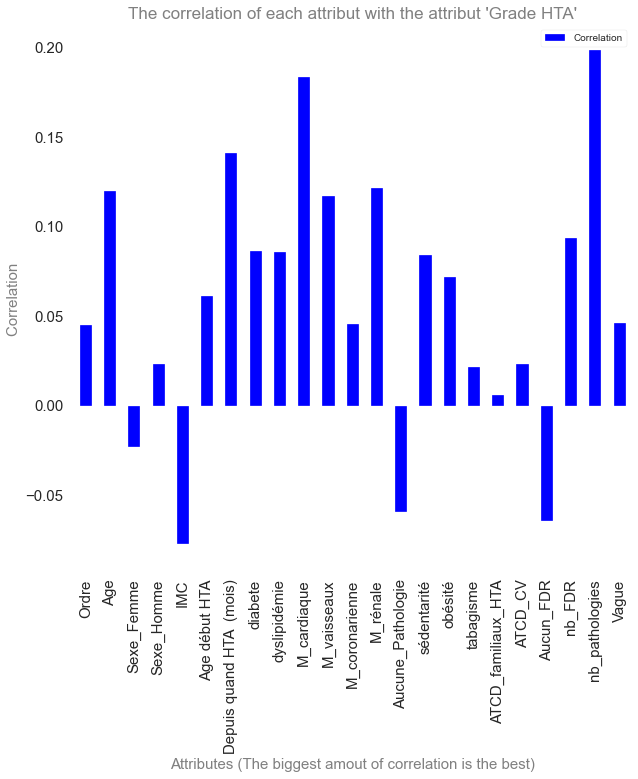

In [ ]:
#Attribute selection to predict GHTA

def visualize_Correlation_Attributes(final_dataset):
    corr_matrix = final_dataset.corr()
    corr_matrix['Grade HTA'].sort_values(ascending=False)
    df= pd.DataFrame()
    df['Grade HTA']=corr_matrix['Grade HTA']
    df['ID'] = df.index
    df.rename(columns={'Grade HTA': "Correlation"},inplace=True)
    
    df.drop(df.loc[df['ID']=="Grade HTA"].index, inplace=True)
    
   
    df.plot(kind='bar',x='ID',y='Correlation',color='blue',fontsize=15,figsize=(10, 10))
    plt.title("The correlation of each attribut with the attribut 'Grade HTA'",fontsize=17, color="gray")
    plt.xlabel('Attributes (The biggest amout of correlation is the best)',fontsize=15, color="gray")
    plt.ylabel('Correlation ',fontsize=15, color="gray")
    plt.show()
    return df

df=visualize_Correlation_Attributes(df_with_hta_nona)

# Classification de grade HTA

### 1. Modélisation


In [ ]:
#Train Some classifiers and estimate their score by "accuracy_score()"


def train_RF_classifier(x_train, y_train,x_test,y_test):
    params={
        'n_estimators' :  np.arange(1, 25)
    }
    grid_rf = GridSearchCV(RandomForestClassifier(),param_grid=params, cv=5)
    grid_rf.fit(x_train,y_train)   
    y_pred = grid_rf.predict(x_test)
    rf_acc_score = accuracy_score(y_test, y_pred)
    rf_precision_score = precision_score(y_test, y_pred, average='macro')

    rf_recall_score = recall_score(y_test, y_pred, average='micro')
#     confusion_matrix(grid_rf, x_test, y_test, "Random Forest")  
    
    return grid_rf.best_estimator_,rf_acc_score,rf_precision_score ,rf_recall_score


def train_KNN_classifier(x_train, y_train,x_test,y_test):
    params={
    'n_neighbors' :  np.arange(14, 25)
    }
    grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params, cv=5)
    grid_knn.fit(x_train,y_train)  
    y_pred = grid_knn.predict(x_test)
    knn_acc_score = accuracy_score(y_test, y_pred)
    knn_precision_score = precision_score(y_test, y_pred, average='micro')

    knn_recall_score = recall_score(y_test, y_pred, average='micro')
#     confusion_matrix(grid_knn,x_test, y_test,"KNN")
    
    return grid_knn.best_estimator_,knn_acc_score, knn_precision_score , knn_recall_score
    
def train_SVM_classifier(x_train, y_train,x_test,y_test):
    clf = SVC(gamma='auto')
    modelSVM=clf.fit(x_train, y_train)
    y_pred = modelSVM.predict(x_test)
    svm_acc_score = accuracy_score(y_test, y_pred)
    svm_precision_score = precision_score(y_test, y_pred, average='micro')

    svm_recall_score= recall_score(y_test, y_pred, average='micro')
    
#     confusion_matrix(modelSVM,x_test, y_test,"SVM")
    return modelSVM,svm_acc_score, svm_precision_score, svm_recall_score


def train_GNB_Classifier(x_train, y_train,x_test,y_test):
    gnb = GaussianNB()
    model_NB=gnb.fit(x_train, y_train)
    y_pred = model_NB.predict(x_test)
    NB_acc_score = accuracy_score(y_test, y_pred)
    NB_precision_score = precision_score(y_test, y_pred, average='micro')

    NB_recall_score = f1_score(y_test, y_pred, average='micro')
#     confusion_matrix(model_NB,x_test, y_test,"Naive Bayes")
    return model_NB,NB_acc_score, NB_precision_score, NB_recall_score




### 2. Evaluation

In [ ]:

def estimate_Scores_Models(x,y):
    #  split x and y to train set and test set
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

    
    knn_model,knn_acc_score, knn_precision_score, knn_recall_score = train_KNN_classifier(x_train, y_train,x_test,y_test)
    
    rf_model,rf_acc_score, rf_precision_score ,rf_recall_score  = train_RF_classifier(x_train, y_train,x_test,y_test)
    
    svm_model,svm_acc_score, svm_precision_score, svm_recall_score = train_SVM_classifier(x_train, y_train,x_test,y_test)
    
    model_NB,NB_acc_score, NB_precision_score, NB_recall_score =train_GNB_Classifier(x_train, y_train,x_test,y_test)
    
    scores  = {'Model':  [knn_model, rf_model,svm_model,model_NB],
           'Acc_Score': [knn_acc_score, rf_acc_score ,svm_acc_score,NB_acc_score],
           'precision_score': [knn_precision_score, rf_precision_score ,svm_precision_score,NB_precision_score],
           'recall_score' : [knn_recall_score, rf_recall_score ,svm_recall_score,NB_recall_score] 
          }
    
    scores= pd.DataFrame (scores, columns = ['Model','Acc_Score','precision_score','recall_score'])
    
    scoresToVisualize  = {'Model':  ['KNN_Classifier', 'RandomeForest','SVM','NaiveBayes'],
           'Acc_Score': [knn_acc_score, rf_acc_score,svm_acc_score,NB_acc_score],
            'precision_score': [knn_precision_score, rf_precision_score ,svm_precision_score,NB_precision_score],
           'recall_score' : [knn_recall_score, rf_recall_score ,svm_recall_score,NB_recall_score] 
                          
          }
    scoresToVisualize=pd.DataFrame (scoresToVisualize, columns = ['Model','Acc_Score'])
    return scores,scoresToVisualize




# ******************* confusion matrix plot*********************************************
def confusion_matrix(model_name,x_test, y_test,graph_title):
    disp = plot_confusion_matrix(model_name, x_test, y_test,
                                 cmap=plt.cm.Blues,normalize="true")
    disp.ax_.set_title(graph_title)
#     plt.show()
#     ***********************************************************************************
    

def visualize_Score_Classifiers(scoresToVisualize):
   
    scoresToVisualize.plot(kind='bar',x='Model',y='Acc_Score',color='blue')
    plt.title("The scores of each classification algorithme",fontsize=17, color="gray")
    plt.xlabel('Algorithme (The biggest score is the best)',fontsize=15, color="gray")
    plt.ylabel('Score ',fontsize=15, color="gray")
    plt.show()
    

In [ ]:
scores,scoresToVisualize = estimate_Scores_Models(x,y)
scoresToVisualize

,Model,Acc_Score
0,KNN_Classifier,0.519740
1,RandomeForest,0.457771
2,SVM,0.467766
3,NaiveBayes,0.472764


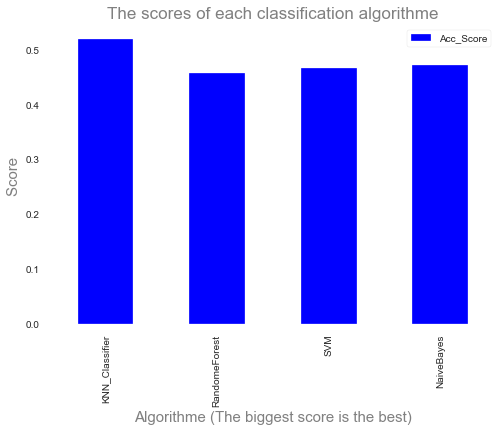

In [ ]:
visualize_Score_Classifiers(scoresToVisualize)

### 3. Classification par le meilleur algorithme

In [ ]:
def classify_by_KNN(x,y,x_TO_Predict):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
    knn_model,knn_acc_score = train_KNN_classifier(x_train, y_train,x_test,y_test)
    y_pred=knn_model.predict(x_To_predict)
    y_pred = pd.DataFrame(y_pred)
    hta_predicted = pd.DataFrame(index=x_To_predict.index)
    hta_predicted["Grade HTA"] = y_pred.values
    
    #Merge the dataset with the targets predictes 
    Xpred_predictedHTA = pd.merge(x_To_predict, hta_predicted, left_index=True, right_index=True)
    return Xpred_predictedHTA


def classify_by_RandomeForest(x,y,x_TO_Predict):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
    rf_model,rf_acc_score = train_RF_classifier(x_train, y_train,x_test,y_test)
    y_pred=rf_model.predict(x_To_predict)
    y_pred = pd.DataFrame(y_pred)
    hta_predicted = pd.DataFrame(index=x_To_predict.index)
    hta_predicted["Grade HTA"] = y_pred.values
    
    #Merge the dataset with the targets predictes 
    Xpred_predictedHTA = pd.merge(x_To_predict, hta_predicted, left_index=True, right_index=True)
    return Xpred_predictedHTA

def classify_by_SVM(x,y,x_TO_Predict):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
    svm_model,svm_acc_score = train_SVM_classifier(x_train, y_train,x_test,y_test)
    y_pred=svm_model.predict(x_To_predict)
    y_pred = pd.DataFrame(y_pred)
    hta_predicted = pd.DataFrame(index=x_To_predict.index)
    hta_predicted["Grade HTA"] = y_pred.values
    
    #Merge the dataset with the targets predictes 
    Xpred_predictedHTA = pd.merge(x_To_predict, hta_predicted, left_index=True, right_index=True)
    return Xpred_predictedHTA


def classify_by_NaiveBayes(x,y,x_TO_Predict):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
    model_NB,NB_acc_score=train_GNB_Classifier(x_train, y_train,x_test,y_test)
    y_pred=model_NB.predict(x_To_predict)
    y_pred = pd.DataFrame(y_pred)
    hta_predicted = pd.DataFrame(index=x_To_predict.index)
    hta_predicted["Grade HTA"] = y_pred.values

    #Merge the dataset with the targets predictes 
    Xpred_predictedHTA = pd.merge(x_To_predict, hta_predicted, left_index=True, right_index=True)
    return Xpred_predictedHTA

def classifyByBestModel(scores, x_To_predict):
    
    best_score=scores["Acc_Score"].max()
    best_model=scores["Model"].loc[(scores["Acc_Score"] == best_score)]
    model=best_model.iloc[0]
    y_pred=model.predict(x_To_predict)
    y_pred = pd.DataFrame(y_pred)
   
    hta_predicted = pd.DataFrame(index=x_To_predict.index)
    hta_predicted["Grade HTA"] = y_pred.values
    
    #Merge the dataset with the targets predictes 
    Xpred_predictedHTA = pd.merge(x_To_predict, hta_predicted, left_index=True, right_index=True)
    return Xpred_predictedHTA


def Prepare_data_PAS_DAS(df_with_hta_nona,Xpred_predictedHTA,data,df_with_poids_taille):
    df_complet= pd.concat([df_with_hta_nona,Xpred_predictedHTA])  
    df_complet= pd.merge(df_complet, df_with_poids_taille[["Taille (cm)","Poids (kg)"]],left_index=True, right_index=True)
    df_PAS= pd.merge(df_complet, data[["Pression arterielle SYSTOLIQUE (en mmHg)"]],left_index=True, right_index=True)
    df_PAD= pd.merge(df_complet, data[["Pression artérielle DIASTOLIQUE (en mmHg)"]],left_index=True, right_index=True) 
    return df_PAS, df_PAD






In [ ]:
Xpred_predictedHTA= classifyByBestModel(scores, x_To_predict)

# Prédiction de PAS/PAD

In [ ]:
df_PAS, df_PAD= Prepare_data_PAS_DAS(df_with_hta_nona,Xpred_predictedHTA,data,df_with_poids_taille)

### 1. Modélisation

In [ ]:

def BayesianRidge_PAS_PAD(df_PAD):
   #seperate the observations that contains NAN from the complete ones
    df_PAD2 = df_PAD.copy(deep=False)
    df_PAD_nona = df_PAD2.dropna()
    df_PAD_only_na = df_PAD[~df_PAD.index.isin(df_PAD_nona.index)]
    
    #split the complete data into data to create the model and data to test the model   
    Y=  df_PAD_nona.iloc[:,-1]
    X = df_PAD_nona.iloc[:, :-1] 
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
#     reg = SVC(C=10, kernel="linear", probability=True)

    # train and test the model of Regression
#     reg = linear_model.BayesianRidge()
#     params={
#     'n_neighbors' :  np.arange(2, 25)
#     }
#     reg = GridSearchCV(KNeighborsClassifier(),param_grid=params, cv=5)
#     params={
#         'n_estimators' :  np.arange(2, 30)
#     }
#     reg = GridSearchCV(RandomForestClassifier(),param_grid=params, cv=5)
#     reg = GaussianNB()
#     reg = DecisionTreeRegressor(random_state=0)
    reg = SVC(gamma='auto')
#     reg = linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_predicted=reg.predict(x_test) 
    score= mean_absolute_error(y_test, y_predicted) 
    
    #prepare the data To predict
    X_to_predict = df_PAD_only_na.iloc[:, :-1] 
    y_pred=reg.predict(X_to_predict)
    
    #prepare the data to return
    ypred_dataframe = pd.DataFrame(y_pred)
    indexs=X_to_predict.index
    ypred_dataframe=ypred_dataframe.set_index([indexs])
    Y_Total =pd.concat([ypred_dataframe,Y])
    Y_Total.sort_index(inplace=True)
    
    return score,Y_Total,y_test, y_predicted

def impute_PAS_DAS(df_PAS, df_PAD):
    score_PAS,Y_Total_PAS,y_test_s, y_predicted_s =BayesianRidge_PAS_PAD(df_PAS)
    score_PAD,Y_Total_PAD ,y_test_d, y_predicted_d=BayesianRidge_PAS_PAD(df_PAD)
    df = df_PAD.iloc[:, :-1] 
    
    df = pd.merge(df, Y_Total_PAS, left_index=True, right_index=True)
    df = pd.merge(df, Y_Total_PAD, left_index=True, right_index=True)  
    df.rename(columns={'0_x': "PAS","0_y":"PAD"},inplace=True)
    df= round(df)
    return df,score_PAS,score_PAD
    

### 2. Evaluation

In [ ]:
df_PAS_DAS,score_PAS,score_PAD = impute_PAS_DAS(df_PAS, df_PAD)
print(score_PAS,score_PAD)

15.326923076923077 7.815028901734104


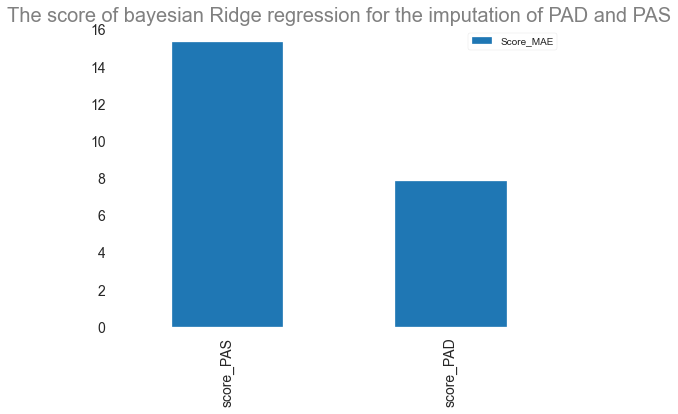

In [ ]:
def visualize_Score_Impute_PAS_PAD(score_PAS,score_PAD):
    # initialise data of lists. 
    data = {'Score_MAE':[score_PAS,score_PAD]} 
    # Creates pandas DataFrame. 
    df = pd.DataFrame(data, index =['score_PAS', 'score_PAD']) 
    df.plot.bar(fontsize=14)
    plt.title("The score of bayesian Ridge regression for the imputation of PAD and PAS",fontsize=20, color="gray")
    plt.show()   
visualize_Score_Impute_PAS_PAD(score_PAS,score_PAD)

In [ ]:
# -------------------------------------inverse dummies --------------------------------------------------
def inverse_Dummies_Poid_Taille(dataset_with_dummies):
#     enter final dataset with dummies
    dataset_without_dummies = dataset_with_dummies.copy()
    dataset_without_dummies['Sexe'] = dataset_without_dummies[['Sexe_Femme','Sexe_Homme']].idxmax(axis=1)
    dataset_without_dummies['Marié'] = dataset_without_dummies[['Marié_Non','Marié_Nsp','Marié_Oui']].idxmax(axis=1)
    dataset_without_dummies['Assurance'] = dataset_without_dummies[['Assurance_Non','Assurance_Nsp','Assurance_Oui']].idxmax(axis=1)
    dataset_without_dummies.drop(['Sexe_Femme','Sexe_Homme','Marié_Non','Marié_Oui','Marié_Nsp','Assurance_Non','Assurance_Nsp',
                              'Assurance_Oui'],axis=1, inplace=True)
    

    dataset_without_dummies["Sexe"].replace({"Sexe_Femme": "Femme", "Sexe_Homme": "Homme"}, inplace=True)
    dataset_without_dummies["Marié"].replace({"Marié_Non": "Non", "Marié_Oui": "Oui", "Marié_Nsp":"Nsp"}, inplace=True)
    dataset_without_dummies["Assurance"].replace({"Assurance_Non": "Non", "Assurance_Nsp": "Nsp","Assurance_Oui": "Oui"},
                                             inplace=True)
   
    return dataset_without_dummies

def formate_Final_Data(df_PAS_DAS, df_fdr_pathol_imputed,labelencoder2,data):
    df_complet= df_PAS_DAS.copy(deep=False)
    
    
    df_complet= pd.merge(df_complet, df_fdr_pathol_imputed[["Assurance_Non","Assurance_Oui","Assurance_Nsp",
                                                               "Marié_Non","Marié_Nsp", "Marié_Oui"]],left_index=True, right_index=True)
    df_complet= pd.merge(df_complet, data[["Profession"]],left_index=True, right_index=True)
    
    #Inverse numerical values to categorical for "gradHTA" column
    df_complet['Grade HTA']=labelencoder2.inverse_transform(df_complet['Grade HTA'])
    
    #add a column TypeIMC calculated from IMC 
    #df_complet_with_TypeIMC=calculate_IMC(df_complet)
    df_complet_with_TypeIMC=set_IMCtype(df_complet)
    df_complet_without_dumies=inverse_Dummies_Poid_Taille(df_complet_with_TypeIMC)
    
    df_complet_without_dumies["Tranche d'âge"] = pd.cut(x=df_complet_without_dumies['Age'], bins=[0,5,10,16,20,30,40,50,60,70,80,90,100,110,120])
    
    
    
    #Reordre the columns    
    df_complet_without_dumies=df_complet_without_dumies[['Ordre','Vague', 'Sexe', 'Age',"Tranche d'âge",'Poids (kg)','Taille (cm)', 'IMC', 'Type IMC',
                                                         'Profession', 'Marié', 'Assurance','diabete', 'dyslipidémie', 
                                                         'M_cardiaque', 'M_vaisseaux','M_coronarienne', 'M_rénale',
                                                         'Aucune_Pathologie', 'sédentarité','obésité', 'tabagisme', 
                                                         'ATCD_familiaux_HTA', 'ATCD_CV', 'Aucun_FDR','nb_FDR', 
                                                         'nb_pathologies','Age début HTA', 'Depuis quand HTA  (mois)', 
                                                         'Grade HTA', 'PAS', 'PAD']]
    
    #Reorder the rows by index
    df_complet_without_dumies.sort_index(inplace=True)
    
    return df_complet_without_dumies


In [ ]:
df_final=formate_Final_Data(df_PAS_DAS, df_fdr_pathol_imputed,labelencoder2,data)

df_final


,Ordre,Vague,Sexe,Age,Tranche d'âge,Poids (kg),Taille (cm),IMC,Type IMC,Profession,...,ATCD_familiaux_HTA,ATCD_CV,Aucun_FDR,nb_FDR,nb_pathologies,Age début HTA,Depuis quand HTA (mois),Grade HTA,PAS,PAD
0,190001.0,12019.0,Homme,85.0,"(80, 90]",80.0,175.0,-1.0,IMC non significatif,Retraité,...,0.0,0.0,0.0,1.0,3.0,75.0,120.0,grade_1,160.0,80.0
1,190002.0,12019.0,Homme,92.0,"(90, 100]",96.0,177.0,-1.0,IMC non significatif,Retraité,...,0.0,0.0,0.0,2.0,4.0,72.0,240.0,grade_2,160.0,80.0
2,190003.0,12019.0,Homme,64.0,"(60, 70]",84.0,180.0,26.0,Surpoids,Menuisier,...,0.0,0.0,0.0,1.0,0.0,58.0,72.0,grade_1,140.0,85.0
3,190004.0,12019.0,Homme,82.0,"(80, 90]",95.0,176.0,-1.0,IMC non significatif,Sans profession,...,0.0,0.0,0.0,2.0,6.0,62.0,240.0,grade_2,170.0,80.0
4,190005.0,12019.0,Homme,66.0,"(60, 70]",75.0,179.0,-1.0,IMC non significatif,Agriculteur,...,0.0,0.0,0.0,1.0,0.0,66.0,6.0,grade_1,150.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10247,283086.0,22018.0,Femme,65.0,"(60, 70]",73.0,158.0,29.0,Surpoids,Non précisé,...,0.0,0.0,0.0,1.0,1.0,58.0,83.0,grade_3,130.0,80.0
10248,283087.0,22018.0,Homme,68.0,"(60, 70]",69.0,170.0,-1.0,IMC non significatif,Retraité,...,0.0,0.0,0.0,2.0,1.0,62.0,72.0,grade_1,130.0,80.0
10249,283088.0,22018.0,Femme,77.0,"(70, 80]",80.0,167.0,-1.0,IMC non significatif,Non précisé,...,0.0,1.0,0.0,2.0,1.0,67.0,121.0,grade_2,130.0,80.0
10250,283089.0,22018.0,Homme,58.0,"(50, 60]",64.0,172.0,22.0,Poids idéal,Non précisé,...,0.0,0.0,0.0,1.0,1.0,55.0,36.0,grade_3,130.0,80.0
